#### In this assignment, I'm going to extract data from twitter on the 3 presidential candidates (Peter Obi, Tinubu and Atiku), using their names as search string. With the aim of checking the candidate with the most polarity (positive tweets) between Jan 1st, 2022 to Nov 8th, 2022.

In [6]:
#!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [7]:
# pip install textblob

In [12]:
pip install nest-asyncio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import twint
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import glob
import os
from datetime import datetime
from textblob import TextBlob
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from sqlalchemy import create_engine


import nest_asyncio
nest_asyncio.apply() # I used this nezt_asyncio to resolve this error "This event loop is already running"

In [15]:
# creating a search string 
candidates={"Bola Ahmed Tinubu": "Asiwaju\Tinubu\Jagaban", 
           "Peter Obi": "PO\Peter Obi\ObiDatti", 
           "Atiku": "Atiku"}

In [16]:
def twintConfig(search_string):
    c = twint.Config()
    c.Search = search_string[1]
    c.Limit=500
    c.Lang = 'en'
    c.Pandas = True
    c.Pandas_au = True          
    c.Pandas_clean=True
    c.Since='2022-01-01'
    c.Until='2022-11-08'
    twint.run.Search(c)

In [20]:
def Run_Twint(search_vals):
    
    #set empty dataframe for join
    out_df= pd.DataFrame()
    
    for candidates in search_vals.items():
        print ("running for search item: "+candidates[0]+"\n")
        print ("Search string: "+candidates[1]+"\n")
        
        #run twint
        twintConfig(candidates)
        
        #get dataframe
        candidates_2023 = twint.storage.panda.Tweets_df
        
        #join Dataframes and create 'candidates' column
        candidates_2023["candidates"]= candidates[0]
        out_df = pd.concat([out_df,candidates_2023])
        
    return out_df

In [21]:
# Extracting the tweets of the candidates from Jan 1st, 2022 till Nov 8th, 2022.
candidates_2023 = Run_Twint(candidates)

running for search item: Bola Ahmed Tinubu

Search string: Asiwaju\Tinubu\Jagaban

1589764392199294977 2022-11-08 00:39:02 +0100 <ooredolapo> @firstladyship Stop worrying yourself over our next president in person of Asiwaju Bola Ahmed Tinubu. I swear PO no fit win even if he's the only candidate contesting 🤪
1589762989334618112 2022-11-08 00:33:27 +0100 <ooredolapo> @neckobi What's this one tweeting? Deep inside you, you know you're lying to yourself but you're trying to impress your paymaster. We understand your hatred for him (Tinubu)🤣🤣🤣🤣🤣
1589759942428602369 2022-11-08 00:21:21 +0100 <ABagadozi> @officialABAT @ABATMediaCentre @Progressive4BAT  we stand with Asiwaju Bola Ahmed Tinubu Jagaban Borgu come 2023 insha Allah.  https://t.co/S8oGBq2q33
1589759791446241280 2022-11-08 00:20:45 +0100 <Jagaban_Olu> @AjuriNgelale This man is too good.  Tinubu-Shettima is the goal.👌 May Asiwaju and Shettima succeed.🙏
1589743505274204160 2022-11-07 23:16:02 +0100 <JAGABAN_JAGABA> Asiwaju Bola Ahme

1589512658424070144 2022-11-07 07:58:44 +0100 <Joe_Akpanke> @Carly55461264 @Mohammadpato1 @ABATMediaCentre @akomscopy @aruhullahi @IjeleSpeaksNaij @36Kinniun @AdewoleAdewuyi2 The APC realized that Asiwaju Bola Ahmed Tinubu is senile &amp; cannot articulate/make coherent presentation without a script. So they made up their minds that Jagaban will never attend any meeting of intellectuals to discuss the issues caused by the ineptitude,  https://t.co/OLsvWeuzOz
1589506132225437699 2022-11-07 07:32:48 +0100 <gistpalava> First, Dino should learn how to control himself in public  Moreover, Reuben Abati should not have moderated the debate, he's a partisan  Furthermore, Asiwaju Bola Ahmed Tinubu is a SCAM. Jagaban will not attend any gathering of intellectuals.He dodged the NBA, the LCCI &amp; ARISE TV  https://t.co/GeNCVtRqSt
1589505457001234433 2022-11-07 07:30:07 +0100 <LifeOfEnglio> The APC realized that Asiwaju Bola Ahmed Tinubu is senile &amp; cannot articulate/make coherent presentatio

1589007013542998016 2022-11-05 22:29:29 +0100 <Jagaban_Olu> @mrmacaronii You only have one vote, so rest! Your Obi can only come a distant fourth in next year's Presidential election. Like it or not, you will address Asiwaju Bola Ahmed Tinubu as Mr. President in 2023.
1588961412160065536 2022-11-05 19:28:16 +0100 <O_Muhammad_O> Lol. I’ve noticed the fact that you and your brother don’t have the balls to directly mention Asiwaju in your tweets. You know deep down you that your candidate can’t match the JAGABAN. And you live and thrive in Tinubu’s Lagos. Kontinu…
1588959466011373570 2022-11-05 19:20:32 +0100 <official_banufe> People call me omo Jagaban Omo asiwaju anywhere i pass, i love and support tinubu genuinely, I don't want shishi from him. His victory is my main priority
1588921680088662018 2022-11-05 16:50:23 +0100 <wakikke> SDP's Senator Magnus Abe floors PDP Sim Fubara and APC's Tonye Cole in Port Harcourt Governorship street poll.   Magnus Abe 12 - Sim Fubara 2- Tonye Cole 1. 

1588084817366847488 2022-11-03 09:25:00 +0100 <saheedlawal0234> @fimiletoks Asiwaju Bola Ahmed Tinubu...The Jagaban
1588082602627530752 2022-11-03 09:16:12 +0100 <EEwekoro> follows;  ✅ Asiwaju Bola Ahmed Tinubu (Jagaban), for President Federal Republic of Nigeria   ✅ *Prince (Dr) Dapo Abiodun, MFR, for second term as Ogun State Governor @dabiodunMFR   ✅ *Hon Shuaib Afolabi Salisu (SAS), for Senator, Ogun State Central Senatorial @Officialsas2023
1588037715655786496 2022-11-03 06:17:50 +0100 <iredumare> Asiwaju Bola Ahmed Tinubu  (Jagaban of Borgu)  The Unifier and The Next President of The Federal Republic of Nigeria 🇳🇬   By God’s will and the prayers of many.   AGBADO MASTER !  CASSAVA CAMPAIGNER !  Visionary Man !  Thinker &amp; Doer !!  https://t.co/WIzCENRExD
1587911583488942081 2022-11-02 21:56:38 +0100 <AdeseyojuAdemo1> @jidesanwoolu It is very important to not only remind  but to lay an emphasis on it that Nigerians should not let this golden opportunity to elude them and make s

1587485668338458625 2022-11-01 17:44:12 +0100 <TinubuOclock> May the Lord grant them the fortitude and strength to deal with this painful tragedy  ASIWAJU BOLA AHMED TINUBU
1587482312245116928 2022-11-01 17:30:51 +0100 <TinubuOclock> In 2015, PDP, for the second straight time, denied the North the presidency. Asiwaju led the fight to reclaim it for the North. This is payback time!
1587470851053690880 2022-11-01 16:45:19 +0100 <JustTayo_> “The pragmatic team work that built Lagos to its enviable status today is what I offer to the nation..."  -Asiwaju Bola Ahmed Tinubu  https://t.co/Svzj9hho5h
1587466854087462917 2022-11-01 16:29:26 +0100 <gbenroadeniyi> The manifesto of Asiwaju Bola Tinubu has put a stop to 10000million walk of other contestants. When they were walking Asiwaju was designing how Nigeria will be great, the true democrat will surely shine like stars even in the midst of enclosed darkness, Jagaban the renewed hope.  https://t.co/DgY7JTPy4v
1587440698793631745 2022-11-01 14

1587378971473330177 2022-11-01 10:40:13 +0100 <AnthonyAzubuine> @PO_GrassRootM @PeterObi New Nigeria is coming with ObiDatti 👑👑👑👑💝💝💝💝💝🍅🍅🍅🍓🍓
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
running for search item: Atiku

Search string: Atiku

1589769362940260352 2022-11-08 00:58:47 +0100 <TOmuabor> @omonlakiki @atiku Same person who thinks the north needs a northern president and should not vote igbo or yoruba!
1589769357919662080 2022-11-08 00:58:46 +0100 <Philip01145688> @renoomokri Why is ATIKU running away from the public debate
1589769330090074112 2022-11-08 00:58:39 +0100 <Greatpeter001> @G_Abdulazeez @AishaYesufu @officialABAT @atiku Hyena ... no wonder..
1589769231347826688 2022-11-08 00:58:15 +0100 <Fineboy55X> @elninogolden1 @MartinJ01129907 @Stephmahxie @DanielRegha @atiku Twitter president 😂😂😂
1589769218551328768 2022-11-08 00:58:12 +0100 <Chief_Mayornku> @renoomokri Advice Atiku first..he needs this your advice more
1589769166953000968 2022-

1589767410974089217 2022-11-08 00:51:01 +0100 <iammaximum01> @DeeOneAyekooto @obnna Ty e think still Dey shock me oh tinubu 70 years atiku 75 😂 politics indeed
1589767333425213442 2022-11-08 00:50:43 +0100 <Ka_Asor> @EuginhoCortez The conundrum for me is like this: Atiku can push constitutional reform more successfully than Obi, he(atiku) knows de terrain, but he is also part of the establishment which I’d much rather be pulled down; so question is can I sacrifice paradigm on the alter of devolution🤔
1589767294535684096 2022-11-08 00:50:34 +0100 <EdevbieSon> @IAOkowa @OfficialPDPNig The reposition of the PDP ahead of 2023 general elections will secure  Victory for the Atiku-Okowa PDP Ticket and other PDP Candidates
1589767246100168704 2022-11-08 00:50:22 +0100 <Yareemerhh> Dear @OfficialPDPNig, @atiku, @IAOkowa @IsaAshiruKudan @_dinomelaye PDP is in danger here in kaduna. The leadership of kaduna state PDP are preparing of selling the party and its entire candidates. I myself personall

1589765765187530752 2022-11-08 00:44:29 +0100 <Deblueprint> @cosmasoften Buhari won cause both west and north supported him, Omo this Time around , atiku and kwankwaso are both from the north , so nothing for Tinubu and the youths are mainly behind obi, so Tinubu already lost .
1589765748020613120 2022-11-08 00:44:25 +0100 <HighKay_Excel> @ahmed_oris From the comments I'm reading, does it mean Northerners are not even in support of @atiku?  Wonders!!!!!!!!!!
1589765660132794370 2022-11-08 00:44:04 +0100 <Uzo_hills> PDP folks were the first to declare that the election had gone Tribal-when there was a serious clamour to keep the elections issues based-with hope that the Hausa and Fulani community keys into an Atiku presidency. Gratefully,Kwankwaso,Datti and Tinubu are there to poach.
1589765488745537536 2022-11-08 00:43:23 +0100 <CarlAde_MD> @Iam_Adekunley @AjuriNgelale Who is newly graduated? Bat and Peter Obi are past governors with experience. If you talk of presidential experience t

1589763939638054913 2022-11-08 00:37:14 +0100 <idadaosazeme76> @Naija_Activist Atiku should be commended for the posting and deleting of the Deborah post. Not even Peter Obi, Tinubu, Kwankwaso that was so bold enough to post and delete post at the moment of heat.  Atiku Victory ✌️🙌 come 2023 is sure.
1589763910718357505 2022-11-08 00:37:07 +0100 <foxRonniie> 📦 NAIJABET BLACK FRIDAY SALE 📦  📲 Get Back 5% Bonus on all deposits Up to 500K, On all Fridays in November..  4th, 11th, 18th and 25th of November  If you don't have a NaijaBet account, Sign up today 👉  https://t.co/1Esuqdx3kH  ___ #NaijaBet Reno Tinubu and Atiku Saliba Tuchel  https://t.co/NInp7QvOVV
1589763790786400257 2022-11-08 00:36:38 +0100 <UgwuObenta> @henryshield Talk about your principal Atiku
1589763694451625985 2022-11-08 00:36:15 +0100 <HUNeeyB> @Pres_Adebayo @doyinokupe @PeterObi @officialABAT @atiku Obi we know, Tinubu we know, kwankwaso we know, Atiku we know, even Sowore we know. But, you’re just one of “and others

1589760882531536896 2022-11-08 00:25:05 +0100 <LegalHermit> The greatest irony in this current political climate in Nigeria is Atiku who claims to be a "unifier" ruining the PDP twice for his personal ambition.  Unifier isonu.
1589760863187374081 2022-11-08 00:25:00 +0100 <OnyemachiMarti2> I have budgeted ATIKU and TINUBU election money to open a small shop while my PVC is only for Mr Peter Obi so that my small shop will grow. #naourmoneyweythemsteal.
1589760805431824385 2022-11-08 00:24:46 +0100 <Ordinary_Peep> @Olaitan_Oojo @Rasheethe @IAOkowa But Atiku left, worked against a PDP incumbent, returned &amp; picked PDP ticket &amp; was accommodated against all odds. Then.
1589760792932782080 2022-11-08 00:24:44 +0100 <Beckvibes2> SAY IT TO THEIR HEARING.  HE WILL NEVER WIN.  ATIKU DOESN'T HAVE RESPECT FOR NIGERIANS.  A MAN THAT DELETED HIS TWEET CANNOT LEAD ME, NEVER!
1589760749081182209 2022-11-08 00:24:33 +0100 <thesunnigeria> Udom may resign as Atiku’s PCC chair over lack of funds - 

1589758551035379712 2022-11-08 00:15:49 +0100 <Bundlehofjoy> Prediction for the Tinubu led Administration Ministerial List 2023  1. Minister of Agriculture - Atiku Bagudu  2. Minister of the FCT - Babatunde Raji Fashola   3. Minister of Defense - Kashim Shettima   Watch Out for more 😁
1589758491702722562 2022-11-08 00:15:35 +0100 <OSY_TALKS> @mindset_tweet Madam it's not a vice presidential town hall, you are capping in Yankee accent, if e sure you come live for Nigeria under Atiku pregnancy, 2 cents kee you dia
1589758416360075264 2022-11-08 00:15:17 +0100 <ChukwuemekaOny2> ATIKU don't need your one vote  You did not support ATIKU &amp; he won Wike whom you supported at the PDP PRESIDENTIAL PRIMARIES  WITH YOUR SUPPORT,WIKE LOST. PLS ATIKU DON'T WANT TO LOSE. YOU BETTER HOLD YOUR SUPPORT SO THAT ATIKU CAN WIN  ATIKU DEFEATED BUHARI IN 2019BUT WAS RIGGED
1589758356683911168 2022-11-08 00:15:03 +0100 <jumponitstudio> @renoomokri Sympathize with ATIKU and Tinubu
1589758330893111296 2022-

1589757240705155073 2022-11-08 00:10:37 +0100 <TheNigerianBar> 2023: Anybody supporting Atiku is enemy of Benue – Ortom  https://t.co/7g7YfL4qJO
1589757180760457216 2022-11-08 00:10:22 +0100 <BadmanSupremo> @blossommartins Obj no a saint but he knew atiku cruked ways,obj said it and Nigerian know these.
1589757179875188745 2022-11-08 00:10:22 +0100 <GeraldOIgwe1> @Topboychriss Atiku has failed.he cannot even unite his party.
1589757178088329216 2022-11-08 00:10:22 +0100 <Ibn_Sabeel_> @Fulani_Tutor This is so sad, what has @atiku done to him?   God grants power to whoever he wills. If @atiku  has been destined to win,  Neither him nor any other person can stop it. He is creating a smoke screen to cover his inefficiency as a governor.
1589757165010825217 2022-11-08 00:10:19 +0100 <OTF_hq> @atiku Ndi mgbu
1589757147205681152 2022-11-08 00:10:14 +0100 <pasmighty> Baba Mohammed has thrown in another grenade into Atiku’s camp . Unifier ko , United Arab Emirates ni .
1589757126276091904 2022-

1589756005550026753 2022-11-08 00:05:42 +0100 <IfennaUgochukwu> @omonlakiki @atiku Anu ofia
1589755993713676291 2022-11-08 00:05:39 +0100 <Cocoboy212> @renoomokri DUNSKY..no matter how u show ur hatred for Igbos , it does change us..Instead of ATIKU winning this Election, Sowore go win... Tinubu has already won .... We have nothing to lose
1589755962914934786 2022-11-08 00:05:32 +0100 <terriratata> @Naija_PR #Daniel in this reply of urs to #Atiku post that now make me to know that u no really well. someone is expressing what give me joy at a moment in watching football you are there talking of what might even add thinking to his. Daniel You are a Chelsea fan
1589755941343629312 2022-11-08 00:05:27 +0100 <spokez_100> @dremoskesh @Mbahdeyforyou Lol.. Quick one... Can efcc arrest atiku or Obasanjo or tinubu... Lol... They call it politics you call it structure... 😂😂...
1589755743288569858 2022-11-08 00:04:40 +0100 <VictorOshiolue1> @renoomokri You see how you shoot yourself in the leg? No

1589754641772081152 2022-11-08 00:00:17 +0100 <Oyirigod> @OfficialAPCNg  @atiku  @officialABAT  @fkeyamo  @OfficialPDPNig  Please step down and support @PeterObi for a better Nigeria
1589754628518084609 2022-11-08 00:00:14 +0100 <agege__bread> @amiruk_u @omoluabi1sq @Makavelli275 @atiku You should been quiet,what do you know?
1589754612659081216 2022-11-08 00:00:10 +0100 <FrankNotion_101> We're talking about human lives, we're talking about the 18 people that the Fulani terrorists killed in Ortom's local government, gouged their eyes out and sent them a message to deliver to Ortom.  But what you're more worried about is Ortom publicly speaking against Atiku?
1589754606166609920 2022-11-08 00:00:08 +0100 <DeprinceE3> Coming from someone more dangerous than atiku. You lack moral to be saying this please.  https://t.co/M9NT8ptQ8E
1589754597454671872 2022-11-08 00:00:06 +0100 <ottomxn> See who Atiku go make him Vice mehnn. These fucking stupid politicians
1589754586335948800 2022-11-08 00:

1589753404372709376 2022-11-07 23:55:22 +0100 <obiezuchukky> Because he is not yet the President.  The electorate needs to meet and assess the one who will make far reaching decisions on their behalf, before entrusting him with such authority.  Why will Atiku be dodging debates? I thought he said he has a manifesto. Let him defend it.
1589753402032291840 2022-11-07 23:55:21 +0100 <SunnyAmos10> @U_Rochas If care is not taking, you would be one of Biafran Agitators. They don't recognize opportunity for the same freedom they claim to be fighting for. That's exactly who I can see you to be. Possibly, Atikú/ Okowa paid you to be attacking PETER OBI and unfortunately, U are unknown
1589753382117732354 2022-11-07 23:55:17 +0100 <Leo_Ejiamatu> @Mjbabaa @chukwujiaju @sunnyukc @Imudia_se2 Presidency is one. Meaning the VP and the President are the same office. They are saying it in support of Okowa representing Atiku.  So @abati1990 saw all these and never cautioned Dino? Abati is highly comprom

1589752360423022593 2022-11-07 23:51:13 +0100 <olasoredimeji> @atiku @BwalaDaniel Naso all of una go de die one by one cause Las Las everybody go chop breakfast na debt whether we like it or not
1589752322938540034 2022-11-07 23:51:04 +0100 <youkayeff> @omonlakiki @atiku So Ortom should bring armed Fulani men and mix with his people to understand themselves. Very expensive experiment sha
1589752202704621568 2022-11-07 23:50:35 +0100 <ChukwukaEdward> @renoomokri Atiku's entourage to the US had no visible woman. Atiku obviously doesn't agree with his VP.
1589752199844098049 2022-11-07 23:50:35 +0100 <kolawoleayotund> @Topboychriss Lol mugu. So you think they would be enemy forever… when Atiku wins and your Wike start glotting around, i pray you would still be  around..
1589752168848162816 2022-11-07 23:50:27 +0100 <mertromat> @omo_9ja_2023 @StFreakingKezy @KadariaAhmed Tinubu and Atiku are on a separate day 22  and 23
1589752089005412352 2022-11-07 23:50:08 +0100 <Spotlight_Abby> WhiteBe

1589751256028848128 2022-11-07 23:46:50 +0100 <Victor_HF_> That's how the PDP halleluyat boys here kept on hyping Chimaroke Nnamani until the man's past was revisited. As with Okowa and Atiku, if e didn't dey, e didn't dey.
1589751253587795968 2022-11-07 23:46:49 +0100 <rabibou2> @_khadijah_atiku @Aleyu_umar @__Mufeeda @Aisha__Abdull @Ayshaa_Humaira @Ameenatu_u @faadimato @Ayshat_Hassann @fauziya_wambai @Fauzeyah_wakili @fauzeey_Oumar Love ❤️ 😍
1589751236051763200 2022-11-07 23:46:45 +0100 <HurtfulTruth001> What do you have to say @LailaAtiku? Profiling a whole ethnic group just because of Gov Ortom. What is our business with Ortom's speech?. Is this how Atiku wants to unify the country.
1589751203998896129 2022-11-07 23:46:37 +0100 <Favour_A2> Yesterday’s town hall meeting ,I won’t be surprised if it was funded by  Atiku to ridicule Peter Obi
1589751176534577152 2022-11-07 23:46:31 +0100 <udokafor> @mindset_tweet If Emma(a regular citizen) knew Atiku won’t be there, how come Abati (a 

In [22]:
candidates_2023

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,candidates
0,1589764392199294977,1589490200282923008,1.667864e+12,2022-11-08 00:39:02,+0100,,@firstladyship Stop worrying yourself over our...,en,[],[],...,,,,,"[{'screen_name': 'firstladyship', 'name': 'NEF...",,,,,Bola Ahmed Tinubu
1,1589762989334618112,1589702301509648384,1.667864e+12,2022-11-08 00:33:27,+0100,,@neckobi What's this one tweeting? Deep inside...,en,[],[],...,,,,,"[{'screen_name': 'neckobi', 'name': 'Nonso Obi...",,,,,Bola Ahmed Tinubu
2,1589759942428602369,1589759942428602369,1.667863e+12,2022-11-08 00:21:21,+0100,,@officialABAT @ABATMediaCentre @Progressive4BA...,in,[],[],...,,,,,[],,,,,Bola Ahmed Tinubu
3,1589759791446241280,1589699071740383233,1.667863e+12,2022-11-08 00:20:45,+0100,,@AjuriNgelale This man is too good. Tinubu-Sh...,en,[],[],...,,,,,"[{'screen_name': 'AjuriNgelale', 'name': 'Ajur...",,,,,Bola Ahmed Tinubu
4,1589743505274204160,1589743505274204160,1.667859e+12,2022-11-07 23:16:02,+0100,,"Asiwaju Bola Ahmed Tinubu, APC Presidential ca...",en,[],[],...,,,,,[],,,,,Bola Ahmed Tinubu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,1589750539113619456,1589562806680317954,1.667861e+12,2022-11-07 23:43:59,+0100,,@DEferode @Nkemchor_ @_dinomelaye @OfficialPDP...,en,[],[],...,,,,,"[{'screen_name': 'DEferode', 'name': 'David Ef...",,,,,Atiku
512,1589750472373477376,1589750472373477376,1.667861e+12,2022-11-07 23:43:43,+0100,,@_dinomelaye see your disgraceful self. If dem...,en,[],[],...,,,,,[],,,,,Atiku
513,1589750453444972545,1589690734667796480,1.667861e+12,2022-11-07 23:43:38,+0100,,@Maxajee @KwankwasoRM How did know this? i kno...,en,[],[],...,,,,,"[{'screen_name': 'Maxajee', 'name': 'YaYa Abba...",,,,,Atiku
514,1589750442850152448,1589719170567966721,1.667861e+12,2022-11-07 23:43:36,+0100,,@akingbade_yinka @OneDayEgoBetter @Pres_Adebay...,en,[],[],...,,,,,"[{'screen_name': 'akingbade_yinka', 'name': 'O...",,,,,Atiku


In [24]:
pd.set_option('display.max_columns', None) # used to display all the columns without hidding any

In [25]:
# checking the columns in the dataset
candidates_2023.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'candidates'],
      dtype='object')

In [26]:
candidates_2023.shape

(699, 39)

In [27]:
candidates_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 515
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               699 non-null    object 
 1   conversation_id  699 non-null    object 
 2   created_at       699 non-null    float64
 3   date             699 non-null    object 
 4   timezone         699 non-null    object 
 5   place            699 non-null    object 
 6   tweet            699 non-null    object 
 7   language         699 non-null    object 
 8   hashtags         699 non-null    object 
 9   cashtags         699 non-null    object 
 10  user_id          699 non-null    int64  
 11  user_id_str      699 non-null    object 
 12  username         699 non-null    object 
 13  name             699 non-null    object 
 14  day              699 non-null    int64  
 15  hour             699 non-null    object 
 16  link             699 non-null    object 
 17  urls            

In [28]:
candidates_2023.head(3)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,candidates
0,1589764392199294977,1589490200282923008,1.667864e+12,2022-11-08 00:39:02,+0100,,@firstladyship Stop worrying yourself over our...,en,[],[],381032519,381032519,ooredolapo,Asiwaju Jagaban Omo Olodoide,2,00,https://twitter.com/ooredolapo/status/15897643...,[],[],0,,False,2,0,0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'firstladyship', 'name': 'NEF...",,,,,Bola Ahmed Tinubu
1,1589762989334618112,1589702301509648384,1.667864e+12,2022-11-08 00:33:27,+0100,,@neckobi What's this one tweeting? Deep inside...,en,[],[],381032519,381032519,ooredolapo,Asiwaju Jagaban Omo Olodoide,2,00,https://twitter.com/ooredolapo/status/15897629...,[],[],0,,False,1,0,0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'neckobi', 'name': 'Nonso Obi...",,,,,Bola Ahmed Tinubu
2,1589759942428602369,1589759942428602369,1.667863e+12,2022-11-08 00:21:21,+0100,,@officialABAT @ABATMediaCentre @Progressive4BA...,in,[],[],1002899374102413312,1002899374102413312,ABagadozi,Abubakar Sadiq Bagadozi,2,00,https://twitter.com/ABagadozi/status/158975994...,[],[https://pbs.twimg.com/media/Fg_2PB3XkAE5nMZ.jpg],1,https://pbs.twimg.com/media/Fg_2PB3XkAE5nMZ.jpg,False,0,1,0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu


In [29]:
candidates_2023["language"].unique() # checking if my data has other languages other than English

array(['en', 'in', 'und', 'ht', 'tl', 'ro', 'qam', 'es', 'lv', 'da', 'eu',
       'fr'], dtype=object)

In [30]:
# Dropping other languages that are not English
candidates_2023 = candidates_2023[candidates_2023["language"].isin(['en'])]

In [31]:
candidates_2023["language"].unique() # confirming that other languages are dropped

array(['en'], dtype=object)

In [32]:
candidates_2023["tweet"][1]

1    @neckobi What's this one tweeting? Deep inside...
1    APC and PDP don’t really see each other as opp...
1    @renoomokri Why is ATIKU running away from the...
Name: tweet, dtype: object

In [33]:
# checking for dupicate rows
candidates_2023.duplicated(subset = "tweet", keep = 'first').sum() # we had about 139 duplicate rows

4

In [34]:
#Dropping the duplicated rows  
candidates_2023 = candidates_2023.drop_duplicates(subset=["tweet"],keep="first")

In [35]:
candidates_2023.shape # confirming if duplicates are dropped

(634, 39)

In [36]:
def clean_your_text(text): 
    pat1 = r'@[^ ]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip() 

In [37]:
candidates_2023["tweet"] = candidates_2023["tweet"].apply(clean_your_text)

In [38]:
candidates_2023.shape

(634, 39)

In [39]:
candidates_2023["tweet"][1]

1    what this one tweeting deep inside you you kno...
1    apc and pdp dont really see each other as oppo...
1     why is atiku running away from the public debate
Name: tweet, dtype: object

In [40]:
print("Running sentiment Analysis")

# creating two new columns(polarity and subjectivity)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

candidates_2023["Subjectivity"] = candidates_2023['tweet'].apply(getSubjectivity)
candidates_2023["Polarity"] = candidates_2023['tweet'].apply(getPolarity)

Running sentiment Analysis


C:\ProgramData\Anaconda3\lib\collections\__init__.py:414: RuntimeWarning: coroutine 'Twint.main' was never awaited
  field_names = tuple(map(_sys.intern, field_names))


In [41]:
candidates_2023[['Polarity','tweet']]

,Polarity,tweet
0,0.150000,stop worrying yourself over our next president...
1,0.000000,what this one tweeting deep inside you you kno...
3,0.700000,this man is too good tinubushettima is the go...
4,0.000000,asiwaju bola ahmed tinubu apc presidential can...
5,0.500000,this is where obi can win i will vote for him ...
...,...,...
511,0.000000,massive disgrace
512,0.000000,see your disgraceful self if dem call now you...
513,0.666667,how did know this i know u know hes better tha...
514,-0.071429,since till date una never bring a single evid...


In [42]:
candidates_2023[['Polarity','tweet']]['tweet'].iloc[0]

'stop worrying yourself over our next president in person of asiwaju bola ahmed tinubu i swear po no fit win even if he the only candidate contesting'

In [43]:
#creating a column to show if the tweet is positive, negative or neutral
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

candidates_2023['Analysis'] = candidates_2023['Polarity'].apply(analysis)

In [44]:
candidates_2023[['Polarity','tweet','Analysis', 'search']]

,Polarity,tweet,Analysis,search
0,0.150000,stop worrying yourself over our next president...,Positive,Asiwaju\Tinubu\Jagaban
1,0.000000,what this one tweeting deep inside you you kno...,Neutral,Asiwaju\Tinubu\Jagaban
3,0.700000,this man is too good tinubushettima is the go...,Positive,Asiwaju\Tinubu\Jagaban
4,0.000000,asiwaju bola ahmed tinubu apc presidential can...,Neutral,Asiwaju\Tinubu\Jagaban
5,0.500000,this is where obi can win i will vote for him ...,Positive,Asiwaju\Tinubu\Jagaban
...,...,...,...,...
511,0.000000,massive disgrace,Neutral,Atiku
512,0.000000,see your disgraceful self if dem call now you...,Neutral,Atiku
513,0.666667,how did know this i know u know hes better tha...,Positive,Atiku
514,-0.071429,since till date una never bring a single evid...,Negative,Atiku


In [45]:
candidates_2023["date"] = pd.to_datetime(candidates_2023["date"])

In [46]:
candidates_2023.head(3)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,candidates,Subjectivity,Polarity,Analysis
0,1589764392199294977,1589490200282923008,1.667864e+12,2022-11-08 00:39:02,+0100,,stop worrying yourself over our next president...,en,[],[],381032519,381032519,ooredolapo,Asiwaju Jagaban Omo Olodoide,2,00,https://twitter.com/ooredolapo/status/15897643...,[],[],0,,False,2,0,0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'firstladyship', 'name': 'NEF...",,,,,Bola Ahmed Tinubu,0.45,0.15,Positive
1,1589762989334618112,1589702301509648384,1.667864e+12,2022-11-08 00:33:27,+0100,,what this one tweeting deep inside you you kno...,en,[],[],381032519,381032519,ooredolapo,Asiwaju Jagaban Omo Olodoide,2,00,https://twitter.com/ooredolapo/status/15897629...,[],[],0,,False,1,0,0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'neckobi', 'name': 'Nonso Obi...",,,,,Bola Ahmed Tinubu,0.40,0.00,Neutral
3,1589759791446241280,1589699071740383233,1.667863e+12,2022-11-08 00:20:45,+0100,,this man is too good tinubushettima is the go...,en,[],[],1508999743048978437,1508999743048978437,Jagaban_Olu,Adekunle Olushola,2,00,https://twitter.com/Jagaban_Olu/status/1589759...,[],[],0,,False,0,0,0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'AjuriNgelale', 'name': 'Ajur...",,,,,Bola Ahmed Tinubu,0.60,0.70,Positive


In [47]:
# first get the mean of the candidates
candidates_2023.groupby(['search']).mean()

,created_at,user_id,day,video,retweet,nlikes,nreplies,nretweets,Subjectivity,Polarity
search,,,,,,,,,,
Asiwaju\Tinubu\Jagaban,1.667618e+12,8.166559e+17,3.305970,0.328358,0.0,45.597015,4.820896,14.835821,0.418895,0.160799
Atiku,1.667863e+12,8.072054e+17,1.701245,0.070539,0.0,6.091286,0.684647,1.419087,0.337410,0.059607
PO\Peter Obi\ObiDatti,1.667539e+12,1.130078e+18,3.888889,0.166667,0.0,5.611111,0.000000,1.277778,0.381506,0.267923


In [48]:
df = candidates_2023[['search','Polarity','Analysis']]
df

,search,Polarity,Analysis
0,Asiwaju\Tinubu\Jagaban,0.150000,Positive
1,Asiwaju\Tinubu\Jagaban,0.000000,Neutral
3,Asiwaju\Tinubu\Jagaban,0.700000,Positive
4,Asiwaju\Tinubu\Jagaban,0.000000,Neutral
5,Asiwaju\Tinubu\Jagaban,0.500000,Positive
...,...,...,...
511,Atiku,0.000000,Neutral
512,Atiku,0.000000,Neutral
513,Atiku,0.666667,Positive
514,Atiku,-0.071429,Negative


In [49]:
# getting only positive tweets since the question is to get candidate with most positive comment
df1 = df[(df['Analysis']=='Positive')]
df1

,search,Polarity,Analysis
0,Asiwaju\Tinubu\Jagaban,0.150000,Positive
3,Asiwaju\Tinubu\Jagaban,0.700000,Positive
5,Asiwaju\Tinubu\Jagaban,0.500000,Positive
7,Asiwaju\Tinubu\Jagaban,0.500000,Positive
10,Asiwaju\Tinubu\Jagaban,0.357143,Positive
...,...,...,...
508,Atiku,0.100000,Positive
509,Atiku,0.100000,Positive
510,Atiku,0.100000,Positive
513,Atiku,0.666667,Positive


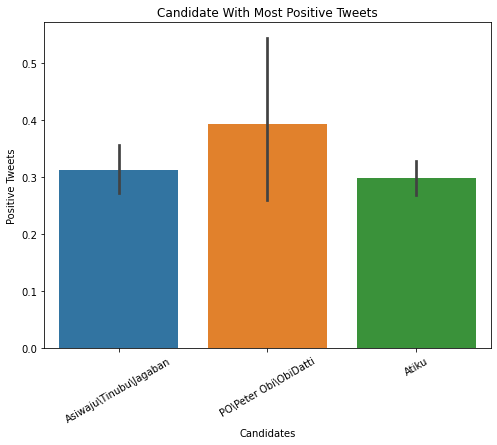

In [50]:
# plotting a barplot
fig = plt.figure(figsize =(8, 6))
plt.xticks(rotation=30)
sns.barplot(data=df1, x='search', y='Polarity').set(title='Candidate With Most Positive Tweets', 
                                                    xlabel ='Candidates', ylabel = 'Positive Tweets');

#### OBSERVATION
The analysis shows that Peter Obi has the most polarity (positive tweets) among the other political opponent. Followed by Atiku and then Tinubu.